# Logistic Regression in Python

Logistic regression is a simple classification algorithm which qualifies as a linear model. It allows us to understand how the change in an independent variable, which is continuous, results in a categorical (or yes/no) result. 

* An example of this situation would be touching a hot object. As the temperature of the object increases, at what temperature of the hot object would the person touching it would start having a reflex action? 
* One more example would be loan defaults. What amount of credit can you give an individual until he starts defaulting on the credit? **We will see this example as the main problem to be solved in this notebook.**
* An example from manufacturing would be a plug gauge, which is a simple yes/no gauge used to tell whether a circular part meets specification or not. As the diameter of a part (such as a shaft) increases, at what diameter does a part stop fitting into a plug gauge.


In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
x = np.arange(10,110,1)
y = []
for e in x:
    if e<40:
        y.append(False)
    else:
        y.append(True)

for index in range(30,70,2):
    if index %2 != 0 :
        y[index] = False
    else:
        y[index] = True
        
data = {"Loansize":x,"Defaulted(yes/no)":y}
dataset = pd.DataFrame(data)

dataset.to_csv("Midincome_default.csv")


We have defined an independent variable x which is a continuous variable, and assigned True or False (binary results) to each value of x, based on some understanding of the problem space. This has helped us model the x and y variables.

## Problem Description

We've generated a hypothetical data set where personal loan data is available for mid income individuals. These individuals have taken loans and have either defaulted or not defaulted (yes/no data). The size of the loan is used as a proxy to understand whether they could possibly default or not.

The x and y variables in this specific logistic regression problem are related in the following way:

$$\log \frac{y}{1-y} = mx + c$$

Where:

$x$ = Loan size (personal loan)
$y$ = Probability of default

The relationship between x and y can therefore be determined by training a model to find $m$ and $c$.

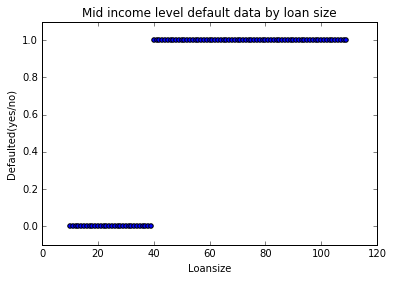

In [4]:
defaultdata = pd.read_csv("Midincome_default.csv")
x = defaultdata["Loansize"]
y = defaultdata["Defaulted(yes/no)"]
defaultdata.plot(x = "Loansize", y = "Defaulted(yes/no)", ylim=(-0.1,1.1), 
                 title="Mid income level default data by loan size", kind = "scatter")

The data has then been organized into a Pandas data frame using the above dictionary comprehension.

## Preparing the data for Cross Validation

In [5]:
from sklearn.cross_validation import train_test_split

xtr, xts, ytr, yts = train_test_split(defaultdata["Loansize"], 
                                      defaultdata["Defaulted(yes/no)"], random_state = 13 )


We then divide the data into train and test parts for cross validation. For this we can use the scikit learn library's train_test_split() function.

## Building the Logistic Regression Model

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtr.reshape(75,1), ytr.reshape(75,1))

C:\Users\rajesh.sampathkumar\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

This is where the actual logistic regression analysis takes place. The x and y training sets are reshaped into the required arrays, and passed to the LogisticRegression object. This object implements methods for fit(), predict() and score(). We'll see all of these in the notebook.

* The fit() method above constructs a logistic regression model using the training sets. Once the model has been constructed, it can be analyzed by scoring the method against the training set.
* We can also score using the sklearn metrics functionality - we can construct a confusion matrix, and calculate accuracy and adjusted rand scores.
* The function's built in score() method can also be used to evaluate model performance.
* We can understand the model's performance this way and then apply it to different situations as data comes in.

In [7]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score, accuracy_score

In [8]:
print "The slope of the logistic regression linear model is %f and the intercept is %f" %(lr.coef_,lr.intercept_)

The slope of the logistic regression linear model is 0.090279 and the intercept is -3.112745


In [9]:
print "This can also be written as log(1/1-y) = %f x + %f" %(lr.coef_,lr.intercept_)

This can also be written as log(1/1-y) = 0.090279 x + -3.112745


The equation for the logistic regression model in this case can be written as:
$$ \ln \frac{y}{1-y} = 0.09x - 3.11 $$

We would expect to do predictions of y based on x using this function. Let's try to find the value of y for an x of 59.0:

Probability of Loan size of 25.000000 returning a default is 0.298222
Probability of Loan size of 25.000000 returning a non-default is 0.701778


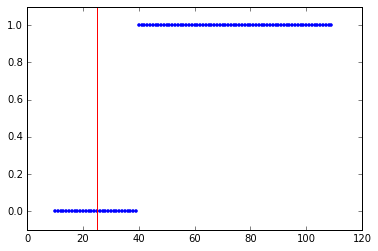

In [10]:
xval = 25
#lr.predict_proba(xval)[0][0]
print "Probability of Loan size of %f returning a default is %f" %(xval, lr.predict_proba(xval)[0][1]) 
print "Probability of Loan size of %f returning a non-default is %f" %(xval, lr.predict_proba(xval)[0][0])
plt.plot(x,y, ".")
plt.ylim(-0.1, 1.1)
plt.axvline(xval,-.1,1.1, c="r")

We can see above that for different values of x, there is a different likelihood of getting either the True result, or the False result. Naturally, the chance of this is modelled using a smooth, logistic function.

Now let us see how the function that is used to model this data can be plotted. For each value of x, we need to find the corresponding value of y from the predicted probability likelihood. This is done (as above) using the predict_proba() method within the LogisticRegression() object.

In [11]:
print "Loan size\tProbability of default\n"
for lsize in range(0,100,10):
    print lsize,"\t\t", lr.predict_proba(lsize)[0][1]

Loan size	Probability of default

0 		0.042584601366
10 		0.0988598652806
20 		0.212960753532
30 		0.400259731046
40 		0.622084238534
50 		0.802372878946
60 		0.909206010824
70 		0.961088094939
80 		0.983849994308
90 		0.993388690329


The above table shows the probability of default estimated by the algorithm, for different values of the loan size.

Naturally, this means that we have a function that models the probability of y = 0 or y = 1, based on an x. This function can be plotted, as shown below.

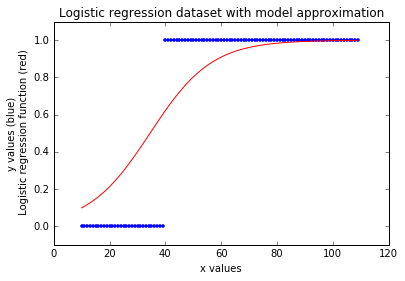

In [12]:
yvals = []

for xvals in x:
    yvals.append(lr.predict_proba(xvals)[0][1])


plt.plot(x,y, ".")
plt.xlabel("x values")
plt.ylabel("y values (blue)\n Logistic regression function (red)")
plt.ylim(-0.1,1.1)
plt.title("Logistic regression dataset with model approximation")
plt.plot(x,yvals, "-", c = "r")

## Observations from the data set and model

* Observe the rate of change of the red line (model) above with respect to the data. As the slope changes quite fast for early values of x, there is a high change in the rate of probability of default as we increase the loan amounts

* Observe that for loan sizes of 40 or greater, we get a pretty low chance of recouping the loan, based on the model. This kind of information may be helpful for decision making in the credit risk in this specific case.

## Evaluating the Model

The model which has been constructed can be evaluated on the training and testing data sets. This can be done using the built in methods, such as score(), and also using the sklearn.metrics module.

In [13]:
#Training set score
print "The predicted accuracy score based on training data set is : ",lr.score(xtr.reshape(75,1),ytr.reshape(75,1))

#Test set score
print "The predicted accuracy score based on test data set is : ", lr.score(xts.reshape(25,1),yts.reshape(25,1))

The predicted accuracy score based on training data set is :  0.946666666667
The predicted accuracy score based on test data set is :  0.96


## Interpreting the scores

There is a possibility of overfitting, or underfitting, whenever we build a model. 
* When score for training set > score for test set, we have overfitting
* When score for training set < score for test set, we have underfitting

We can verify this for the test set, based on the adjusted random score calculator in sklearn.metrics.


In [14]:
print "The adjusted score for the data based on test data set is: ", adjusted_rand_score(yts,lr.predict(xts.reshape(25,1)))

The adjusted score for the data based on test data set is:  0.837574445046


# Multiple Logistic Regression

Multiple logistic regression is a more general case of the logistic regression problem, where there are multiple x variables and a single categorical (yes/no) result. We can see a simple example of this below.

In [31]:
import numpy as np
import pandas as pd


size = 1000

x1 = np.random.normal(60,14,size)
x2 = np.random.normal(20,4,size)
#print len(x1), len(x2)
y = []
for index,e1 in enumerate(x1):
    if e1>3*x2[index]:
        y.append(True)
    else:
        y.append(False)
for index in range(30,70,1):
    if index %2 != 0 :
        y[index] = False
    else:
        y[index] = True

#print len(y)
data = {"Loansize":x1, "Salary":x2, "Defaulted(yes/no)":y}
dataset = pd.DataFrame(data)

dataset.to_csv("Midincome_salary_default.csv")


## Multiple Regression including Salaries Data

We've seen a single variable based logistic regression approach. Now, in a multiple regression approach, we will see the impact of salary and loan size on the probability of loan default.

The data for this case resides in a data sheet. Once the data is pulled into Python, we define variables based on the CSV, and then plot the data to understand its properties. Since there are two variables in this case, we can see independently the effect of salary and of loan size on probability of default.

In [32]:
salarieddefaultdata = pd.read_csv("Midincome_salary_default.csv")
loansize = salarieddefaultdata["Loansize"]
salary = salarieddefaultdata["Salary"]
X = {"Loansize": loansize, "Salary": salary}
xfactors = pd.DataFrame(X)
y = salarieddefaultdata["Defaulted(yes/no)"]
salarieddefaultdata.plot(x = "Loansize", y = "Defaulted(yes/no)", ylim=(-0.1,1.1), 
                 title="Mid income level default data by loan size", kind = "scatter")
salarieddefaultdata.plot(x = "Salary", y = "Defaulted(yes/no)", ylim=(-0.1,1.1), 
                 title="Mid income level default data by loan size", kind = "scatter")
plt.show()

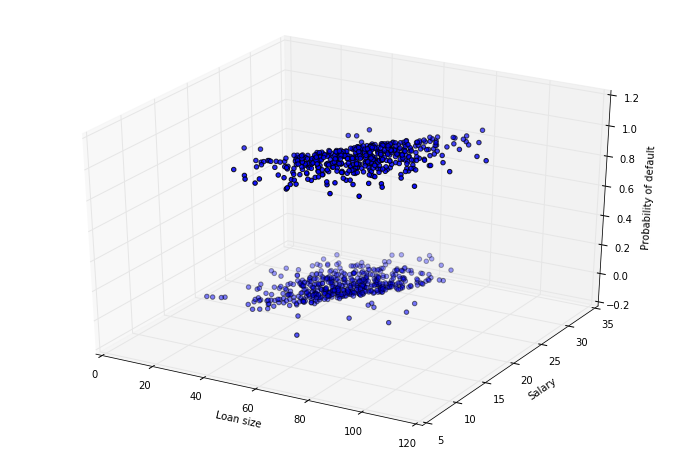

In [45]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X["Loansize"], X["Salary"], y)
ax.set_xlabel("Loan size")
ax.set_ylabel("Salary")
ax.set_zlabel("Probability of default")
plt.show()


Observe how the visualization shows us that as salary increases, the probability of default reduces in general. Also, the greater the loan size, the probability of default also increases in general.

In [34]:
from sklearn.cross_validation import train_test_split

xtr, xts, ytr, yts = train_test_split(xfactors, y, random_state = 13 )

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import adjusted_rand_score

mlr = LogisticRegression()
mlr.fit(xtr, ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
print "The coefficient for \"loan size\" variable is: ", mlr.coef_[0][0]
print "The coefficient for \"salary\" variable is: ", mlr.coef_[0][1]
print "The  intercept is: ", mlr.intercept_[0]


The coefficient for "loan size" variable is:  0.314018877999
The coefficient for "salary" variable is:  -0.93199375651
The  intercept is:  -0.169035752587


In [37]:
print "The logistic regression equation can therefore be written as ln(y/1-y) = %f + %f x1 + %f x2" \
                                            %(mlr.intercept_[0], mlr.coef_[0][0], mlr.coef_[0][1])

The logistic regression equation can therefore be written as ln(y/1-y) = -0.169036 + 0.314019 x1 + -0.931994 x2


Here:
* $x_1$ = Loan size
* $x_2$ = Salary

We see from the coefficients that the greater the loan size, the greater the chance of default. We also see that the greater the take-home salary, the smaller the probability of default. We can express this in terms of the model parameters as a decision function, as in case of single variable logistic regression.

In [38]:
#Training set score
print "The predicted accuracy score based on training data set is : ",mlr.score(xtr,ytr)

#Test set score
print "The predicted accuracy score based on test data set is : ", mlr.score(xts,yts)

#Adjusted random score
print "The adjusted score for the data based on test data set is: ", adjusted_rand_score(yts,mlr.predict(xts))

The predicted accuracy score based on training data set is :  0.976
The predicted accuracy score based on test data set is :  0.996
The adjusted score for the data based on test data set is:  0.983999976366


## Sample test case

Assume that an individual who is drawn from this sample draws a salary of 20. This individual wants to take a loan of 70. What is her chance of default?

### Note about reshaping data

Sometimes, a Numpy array with 2+ dimensions (columns) is expected. Therefore, we need to change the shape of the data from a 1-D column (which is the case when we're simulating a variable), to a 2D array. Hence the need for the reshape() method call on the input vector to predict_proba().


In [39]:
sal = 10
loan = 70

print "Chance of default: ", mlr.predict_proba(np.asarray([loan,sal]).reshape(-1,2))[0][1]
print "Chance of non-default: ", mlr.predict_proba(np.asarray([loan,sal]).reshape(-1,2))[0][0]

Chance of default:  0.999996244736
Chance of non-default:  3.75526426821e-06


## Further sample test cases

We will now construct a series of test cases to explore the algorithm we have created. This will tell us the probability of default for different combinations of salary and loan size. Essentially, we create a multiple level orthogonal array in 2 variables (salary and loan size). We then pass this as an argument to the predict_proba method present within the Multiple Logistic Regression object.

In [40]:
ntests = 100

loansizes = np.linspace(70,10,ntests)
salaries = np.linspace(5,20,ntests)

testcases = zip(loansizes, salaries)
#print testcases

prd = []

for index, testcase in enumerate(testcases):
    #print index+1, "Loan size: \t", round(testcase[0],3), "\tSalary: \t", round(testcase[1],3), "\tChance of default: \t", round (mlr.predict_proba(np.asarray(testcase).reshape(-1,2))[0][1],3)
    prd.append(round (mlr.predict_proba(np.asarray(testcase).reshape(-1,2))[0][1],3))

In [41]:
import matplotlib.pyplot as plt

In [46]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')


xs = [item for item in loansizes]
ys = [item for item in salaries]
zs = [item for item in prd]

ax.plot3D(xs, ys, zs)
ax.scatter(X["Loansize"], X["Salary"], y, c=y)
ax.set_xlabel("Loan size")
ax.set_ylabel("Salary")
ax.set_zlabel("Probability of default")
plt.show()


** Note: ** The above data will display in a separate window. The command to make this happen is %matplotlib qt, which uses the qt toolkit to display the graph in a separate window.